In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout, Activation
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import pathlib

In [5]:
url='/content/drive/MyDrive/Train'
generator= ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_data=generator.flow_from_directory(url,target_size=(128,128),batch_size=10,class_mode='categorical',subset='training')
validation_data=generator.flow_from_directory(url,target_size=(128,128),batch_size=10,class_mode='categorical',subset='validation')
label = list()
for key in train_data.class_indices:
  label.append(key)
validation_data.class_indices
print(label)

Found 1864 images belonging to 15 classes.
Found 457 images belonging to 15 classes.
['Beets', 'Black Sesame', 'Cabbage', 'Carrot', 'Cashew', 'Corn', 'Lotus', 'Melon', 'Orka', 'Peanut', 'Peas', 'Red Bean', 'Rice', 'Sun Flower', 'Tomato']


In [6]:
model= Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding ='same',input_shape=(128,128,3)))
model.add(Conv2D(32,(3,3),activation = 'relu', kernel_initializer= 'he_uniform',padding ='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation = 'relu', kernel_initializer='he_uniform' ))
model.add(Dense(15, activation='softmax'))
opt=Adam(lr=0.002)
model.compile (optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_data,epochs=30,batch_size=64,validation_data=validation_data,verbose=1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/30
187/187 [==============================] - ETA: 0s - loss: 3.7928 - accuracy: 0.3214

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


187/187 [==============================] - 593s 3s/step - loss: 3.7928 - accuracy: 0.3214 - val_loss: 1.4202 - val_accuracy: 0.5208
Epoch 2/30
187/187 [==============================] - 14s 73ms/step - loss: 0.8923 - accuracy: 0.7189 - val_loss: 0.8599 - val_accuracy: 0.7681
Epoch 3/30
187/187 [==============================] - 14s 73ms/step - loss: 0.4294 - accuracy: 0.8948 - val_loss: 0.9682 - val_accuracy: 0.8446
Epoch 4/30
187/187 [==============================] - 14s 73ms/step - loss: 0.2312 - accuracy: 0.9388 - val_loss: 0.9915 - val_accuracy: 0.8228
Epoch 5/30
187/187 [==============================] - 14s 73ms/step - loss: 0.1141 - accuracy: 0.9721 - val_loss: 0.8760 - val_accuracy: 0.8468
Epoch 6/30
187/187 [==============================] - 14s 74ms/step - loss: 0.0946 - accuracy: 0.9802 - val_loss: 0.7888 - val_accuracy: 0.8731
Epoch 7/30
187/187 [==============================] - 14s 73ms/step - loss: 0.0435 - accuracy: 0.9936 - val_loss: 0.7314 - val_accuracy: 0.8709
Epoc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


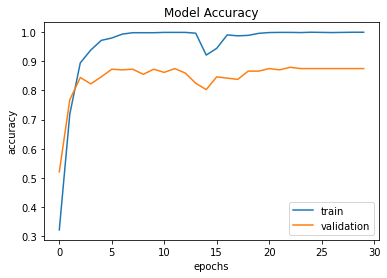

In [7]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','validation'],loc='upper_left')

In [8]:
for image in pathlib.Path('/content/drive/MyDrive/Test').iterdir():
  img = load_img(image,target_size=(128,128))
  plt.imshow(img)
  plt.show()
  img = img_to_array(img)
  img = img.reshape(1,128,128,3)
  print(label[np.argmax(model.predict(img),axis = 1)[0]])

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# nhận diện chính xác 41/60 bức ảnh (63%)

In [10]:
model.save('Final.h5')